Project Members: Junwon, Reuben, Mabel

# Data Import & Text Preprocessing

## Import data

In [ ]:
# Import main packages:

import numpy as np
import pandas as pd
import os
import json
from tqdm.notebook import tqdm
import re, string
import time
import pickle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pulling in arxiv data:

def get_metadata():
    with open('/content/drive/Shareddrives/Math-156-Final-Project/arxiv-metadata-oai-snapshot.json', 'r') as f:
        for line in f:
            yield line

In [ ]:
metadata = get_metadata()
# year_pattern = r'([1-2][0-9]{3})'

for paper in metadata:
    paper_dict = json.loads(paper)
    print('ID: {}\n\n Title: {}\n\nAbstract: {}\nRef: {}\n\nCategory: {}'.format(paper_dict.get('id'), paper_dict.get('title'), paper_dict.get('abstract'), paper_dict.get('journal-ref'), paper_dict.get('categories')))
#     print(paper)
    break

ID: 0704.0001

 Title: Calculation of prompt diphoton production cross sections at Tevatron and
  LHC energies

Abstract:   A fully differential calculation in perturbative quantum chromodynamics is
presented for the production of massive photon pairs at hadron colliders. All
next-to-leading order perturbative contributions from quark-antiquark,
gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as
all-orders resummation of initial-state gluon radiation valid at
next-to-next-to-leading logarithmic accuracy. The region of phase space is
specified in which the calculation is most reliable. Good agreement is
demonstrated with data from the Fermilab Tevatron, and predictions are made for
more detailed tests with CDF and DO data. Predictions are shown for
distributions of diphoton pairs produced at the energy of the Large Hadron
Collider (LHC). Distributions of the diphoton pairs from the decay of a Higgs
boson are contrasted with those produced from QCD processes at the 

In [ ]:
# https://arxiv.org/help/api/user-manual
category_map = {'astro-ph': 'Astrophysics',
'astro-ph.CO': 'Cosmology and Nongalactic Astrophysics',
'astro-ph.EP': 'Earth and Planetary Astrophysics',
'astro-ph.GA': 'Astrophysics of Galaxies',
'astro-ph.HE': 'High Energy Astrophysical Phenomena',
'astro-ph.IM': 'Instrumentation and Methods for Astrophysics',
'astro-ph.SR': 'Solar and Stellar Astrophysics',
'cond-mat.dis-nn': 'Disordered Systems and Neural Networks',
'cond-mat.mes-hall': 'Mesoscale and Nanoscale Physics',
'cond-mat.mtrl-sci': 'Materials Science',
'cond-mat.other': 'Other Condensed Matter',
'cond-mat.quant-gas': 'Quantum Gases',
'cond-mat.soft': 'Soft Condensed Matter',
'cond-mat.stat-mech': 'Statistical Mechanics',
'cond-mat.str-el': 'Strongly Correlated Electrons',
'cond-mat.supr-con': 'Superconductivity',
'cs.AI': 'Artificial Intelligence',
'cs.AR': 'Hardware Architecture',
'cs.CC': 'Computational Complexity',
'cs.CE': 'Computational Engineering, Finance, and Science',
'cs.CG': 'Computational Geometry',
'cs.CL': 'Computation and Language',
'cs.CR': 'Cryptography and Security',
'cs.CV': 'Computer Vision and Pattern Recognition',
'cs.CY': 'Computers and Society',
'cs.DB': 'Databases',
'cs.DC': 'Distributed, Parallel, and Cluster Computing',
'cs.DL': 'Digital Libraries',
'cs.DM': 'Discrete Mathematics',
'cs.DS': 'Data Structures and Algorithms',
'cs.ET': 'Emerging Technologies',
'cs.FL': 'Formal Languages and Automata Theory',
'cs.GL': 'General Literature',
'cs.GR': 'Graphics',
'cs.GT': 'Computer Science and Game Theory',
'cs.HC': 'Human-Computer Interaction',
'cs.IR': 'Information Retrieval',
'cs.IT': 'Information Theory',
'cs.LG': 'Machine Learning',
'cs.LO': 'Logic in Computer Science',
'cs.MA': 'Multiagent Systems',
'cs.MM': 'Multimedia',
'cs.MS': 'Mathematical Software',
'cs.NA': 'Numerical Analysis',
'cs.NE': 'Neural and Evolutionary Computing',
'cs.NI': 'Networking and Internet Architecture',
'cs.OH': 'Other Computer Science',
'cs.OS': 'Operating Systems',
'cs.PF': 'Performance',
'cs.PL': 'Programming Languages',
'cs.RO': 'Robotics',
'cs.SC': 'Symbolic Computation',
'cs.SD': 'Sound',
'cs.SE': 'Software Engineering',
'cs.SI': 'Social and Information Networks',
'cs.SY': 'Systems and Control',
'chao-dyn': 'manual add',
'econ.EM': 'Econometrics',
'econ.GN': 'manual add',
'econ.TH': 'manual add',
'eess.AS': 'Audio and Speech Processing',
'eess.IV': 'Image and Video Processing',
'eess.SP': 'Signal Processing',
'eess.SY': 'manual add',
'gr-qc': 'General Relativity and Quantum Cosmology',
'hep-ex': 'High Energy Physics - Experiment',
'hep-lat': 'High Energy Physics - Lattice',
'hep-ph': 'High Energy Physics - Phenomenology',
'hep-th': 'High Energy Physics - Theory',
'math.AC': 'Commutative Algebra',
'math.AG': 'Algebraic Geometry',
'math.AP': 'Analysis of PDEs',
'math.AT': 'Algebraic Topology',
'math.CA': 'Classical Analysis and ODEs',
'math.CO': 'Combinatorics',
'math.CT': 'Category Theory',
'math.CV': 'Complex Variables',
'math.DG': 'Differential Geometry',
'math.DS': 'Dynamical Systems',
'math.FA': 'Functional Analysis',
'math.GM': 'General Mathematics',
'math.GN': 'General Topology',
'math.GR': 'Group Theory',
'math.GT': 'Geometric Topology',
'math.HO': 'History and Overview',
'math.IT': 'Information Theory',
'math.KT': 'K-Theory and Homology',
'math.LO': 'Logic',
'math.MG': 'Metric Geometry',
'math.MP': 'Mathematical Physics',
'math.NA': 'Numerical Analysis',
'math.NT': 'Number Theory',
'math.OA': 'Operator Algebras',
'math.OC': 'Optimization and Control',
'math.PR': 'Probability',
'math.QA': 'Quantum Algebra',
'math.RA': 'Rings and Algebras',
'math.RT': 'Representation Theory',
'math.SG': 'Symplectic Geometry',
'math.SP': 'Spectral Theory',
'math.ST': 'Statistics Theory',
'math-ph': 'Mathematical Physics',
'nlin.AO': 'Adaptation and Self-Organizing Systems',
'nlin.CD': 'Chaotic Dynamics',
'nlin.CG': 'Cellular Automata and Lattice Gases',
'nlin.PS': 'Pattern Formation and Solitons',
'nlin.SI': 'Exactly Solvable and Integrable Systems',
'nucl-ex': 'Nuclear Experiment',
'nucl-th': 'Nuclear Theory',
'physics.acc-ph': 'Accelerator Physics',
'physics.ao-ph': 'Atmospheric and Oceanic Physics',
'physics.app-ph': 'Applied Physics',
'physics.atm-clus': 'Atomic and Molecular Clusters',
'physics.atom-ph': 'Atomic Physics',
'physics.bio-ph': 'Biological Physics',
'physics.chem-ph': 'Chemical Physics',
'physics.class-ph': 'Classical Physics',
'physics.comp-ph': 'Computational Physics',
'physics.data-an': 'Data Analysis, Statistics and Probability',
'physics.ed-ph': 'Physics Education',
'physics.flu-dyn': 'Fluid Dynamics',
'physics.gen-ph': 'General Physics',
'physics.geo-ph': 'Geophysics',
'physics.hist-ph': 'History and Philosophy of Physics',
'physics.ins-det': 'Instrumentation and Detectors',
'physics.med-ph': 'Medical Physics',
'physics.optics': 'Optics',
'physics.plasm-ph': 'Plasma Physics',
'physics.pop-ph': 'Popular Physics',
'physics.soc-ph': 'Physics and Society',
'physics.space-ph': 'Space Physics',
'q-bio.BM': 'Biomolecules',
'q-bio.CB': 'Cell Behavior',
'q-bio.GN': 'Genomics',
'q-bio.MN': 'Molecular Networks',
'q-bio.NC': 'Neurons and Cognition',
'q-bio.OT': 'Other Quantitative Biology',
'q-bio.PE': 'Populations and Evolution',
'q-bio.QM': 'Quantitative Methods',
'q-bio.SC': 'Subcellular Processes',
'q-bio.TO': 'Tissues and Organs',
'q-fin.CP': 'Computational Finance',
'q-fin.EC': 'Economics',
'q-fin.GN': 'General Finance',
'q-fin.MF': 'Mathematical Finance',
'q-fin.PM': 'Portfolio Management',
'q-fin.PR': 'Pricing of Securities',
'q-fin.RM': 'Risk Management',
'q-fin.ST': 'Statistical Finance',
'q-fin.TR': 'Trading and Market Microstructure',
'quant-ph': 'Quantum Physics',
'stat.AP': 'Applications',
'stat.CO': 'Computation',
'stat.ME': 'Methodology',
'stat.ML': 'Machine Learning',
'stat.OT': 'Other Statistics',
'stat.TH': 'Statistics Theory',
'q-alg': 'manual add'}

In [ ]:
len(category_map)

158

## Create 3 dataframes

In [ ]:
# Create lists to append into dataframe later

titles = []
ids = []
abstracts = []
categories = []
years = []
metadata = get_metadata()
for paper in metadata:
    paper_dict = json.loads(paper)
    ref = paper_dict.get('journal-ref')
    try:
        year = int(ref[-4:])
        if 2018 <= year <= 2020:
            years.append(year)
            ids.append(paper_dict.get('id'))
            titles.append(paper_dict.get('title'))
            abstracts.append(paper_dict.get('abstract'))
            categories.append(paper_dict.get('categories').split())
    except:
        pass

In [ ]:
# Check that all lists have the same length

len(titles), len(ids), len(abstracts), len(categories), len(years)

(15771, 15771, 15771, 15771, 15771)

In [ ]:
# Check to see that we don't have repeated papers:

len(np.unique(np.array(ids)))

15771

In [ ]:
# Create dataframe with all necessary data:

papers = pd.DataFrame({
    'id': ids,
    'title': titles,
    'abstract': abstracts,
    'category': categories,
    'year': years
})

papers.head(10)

,id,title,abstract,category,year
0,0710.1849,Regularity of solutions of the isoperimetric p...,In this work we consider a question in the c...,"[math.DG, math.AP, math.MG]",2018
1,0804.3104,"Teichm\""uller Structures and Dual Geometric Gi...",The Gibbs measure theory for smooth potentia...,"[math.DS, math.CV]",2020
2,0806.3026,Distributional Schwarzschild Geometry from non...,In this paper we leave the neighborhood of t...,[physics.gen-ph],2018
3,0807.3139,Weight Reduction for Mod l Bianchi Modular Forms,Let K be an imaginary quadratic field with c...,[math.NT],2019
4,0810.5491,Nonequilibrium phase transition in a spreading...,We consider a nonequilibrium process on a ti...,[cond-mat.stat-mech],2020
5,0812.2682,Quantum integrable systems in three-dimensiona...,In this paper we construct integrable three-...,"[math-ph, math.MP, nlin.SI, quant-ph]",2019
6,0901.0172,Numerical Performance of Compact Fourth Order ...,In this study the numerical performance of t...,"[physics.flu-dyn, math.NA, physics.comp-ph]",2019
7,0901.4075,Bayesian reasoning in cosmology,We discuss epistemological and methodologica...,"[physics.data-an, physics.hist-ph, physics.pop...",2018
8,0904.0276,Linear Operators and Operator Functions Associ...,The paper develops a theory of spectral boun...,"[math-ph, math.MP]",2020
9,0909.0906,Anomalous scaling due to correlations: Limit t...,We derive theorems which outline explicit me...,[cond-mat.stat-mech],2018


In [ ]:
papers['category'].value_counts()

[cs.CV]                           701
[cs.LG, stat.ML]                  341
[cond-mat.mtrl-sci]               276
[cs.CL]                           244
[math.OC]                         242
                                 ... 
[math.NT, math.AG, math.PR]         1
[eess.AS, cs.AI, cs.CL, cs.SD]      1
[math.CA, astro-ph.SR, gr-qc]       1
[cs.IT, cs.CR, cs.PL, math.IT]      1
[q-alg, math.QA]                    1
Name: category, Length: 3764, dtype: int64

In [ ]:
# Expanded dataframe to account for papers in multiple categories (to be use in supervised learning)

papers_expanded = papers.explode('category')

In [ ]:
papers_expanded.head(10)

,id,title,abstract,category,year
0,0710.1849,Regularity of solutions of the isoperimetric p...,In this work we consider a question in the c...,math.DG,2018
0,0710.1849,Regularity of solutions of the isoperimetric p...,In this work we consider a question in the c...,math.AP,2018
0,0710.1849,Regularity of solutions of the isoperimetric p...,In this work we consider a question in the c...,math.MG,2018
1,0804.3104,"Teichm\""uller Structures and Dual Geometric Gi...",The Gibbs measure theory for smooth potentia...,math.DS,2020
1,0804.3104,"Teichm\""uller Structures and Dual Geometric Gi...",The Gibbs measure theory for smooth potentia...,math.CV,2020
2,0806.3026,Distributional Schwarzschild Geometry from non...,In this paper we leave the neighborhood of t...,physics.gen-ph,2018
3,0807.3139,Weight Reduction for Mod l Bianchi Modular Forms,Let K be an imaginary quadratic field with c...,math.NT,2019
4,0810.5491,Nonequilibrium phase transition in a spreading...,We consider a nonequilibrium process on a ti...,cond-mat.stat-mech,2020
5,0812.2682,Quantum integrable systems in three-dimensiona...,In this paper we construct integrable three-...,math-ph,2019
5,0812.2682,Quantum integrable systems in three-dimensiona...,In this paper we construct integrable three-...,math.MP,2019


In [ ]:
papers_expanded = papers_expanded[['abstract', 'category']]

In [ ]:
papers_expanded.head(10)

,abstract,category
0,In this work we consider a question in the c...,math.DG
0,In this work we consider a question in the c...,math.AP
0,In this work we consider a question in the c...,math.MG
1,The Gibbs measure theory for smooth potentia...,math.DS
1,The Gibbs measure theory for smooth potentia...,math.CV
2,In this paper we leave the neighborhood of t...,physics.gen-ph
3,Let K be an imaginary quadratic field with c...,math.NT
4,We consider a nonequilibrium process on a ti...,cond-mat.stat-mech
5,In this paper we construct integrable three-...,math-ph
5,In this paper we construct integrable three-...,math.MP


In [ ]:
papers_expanded['category'].value_counts()

cs.LG       2228
cs.CV       1558
stat.ML     1377
cs.AI        732
math.OC      660
            ... 
cs.OS          6
cs.GL          4
astro-ph       2
chao-dyn       1
q-alg          1
Name: category, Length: 158, dtype: int64

In [ ]:
papers_expanded = papers_expanded.groupby('category').filter(lambda x: len(x) >= 10)
papers_expanded['category'].value_counts()

cs.LG               2228
cs.CV               1558
stat.ML             1377
cs.AI                732
math.OC              660
                    ... 
nlin.CG               15
q-fin.TR              15
physics.atm-clus      14
hep-lat               11
q-fin.CP              11
Name: category, Length: 150, dtype: int64

In [ ]:
missing_categories = []
for category in papers_expanded['category']:
    if category not in category_map:
      if category not in missing_categories:
        missing_categories.append(category)

missing_categories

[]

In [ ]:
papers_main_category = papers_expanded.copy()
papers_main_category['category'] = papers_main_category['category'].str.split('.').str[0]
papers_main_category = papers_main_category.drop_duplicates(subset=['abstract', 'category'])

In [ ]:
papers_main_category.head(10)

,abstract,category
0,In this work we consider a question in the c...,math
1,The Gibbs measure theory for smooth potentia...,math
2,In this paper we leave the neighborhood of t...,physics
3,Let K be an imaginary quadratic field with c...,math
4,We consider a nonequilibrium process on a ti...,cond-mat
5,In this paper we construct integrable three-...,math-ph
5,In this paper we construct integrable three-...,math
5,In this paper we construct integrable three-...,nlin
5,In this paper we construct integrable three-...,quant-ph
6,In this study the numerical performance of t...,physics


In [ ]:
papers_main_category['category'].value_counts()

cs          7854
math        4364
physics     2167
stat        1903
eess        1348
cond-mat    1346
astro-ph    1086
quant-ph     568
math-ph      423
q-bio        419
gr-qc        307
hep-th       274
nlin         204
q-fin        161
hep-ph       157
nucl-th       74
hep-ex        73
econ          60
nucl-ex       44
hep-lat       11
Name: category, dtype: int64

## Preprocessing Text

In [ ]:
# Define text preprocessing function:

def process_string(text):
    text = re.sub("<.*?>", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    text = re.sub(" +", " ", text)
    text = text.replace('\n', ' ')
    return text

# Demo:

print("Example of a preprocessed text:")
print("Before: " + papers['abstract'][6])
print("After: " + process_string(papers['abstract'][6]))

Example of a preprocessed text:
Before:   In this study the numerical performance of the fourth order compact
formulation of the steady 2-D incompressible Navier-Stokes equations introduced
by Erturk et al. (Int. J. Numer. Methods Fluids, 50, 421-436) will be
presented. The benchmark driven cavity flow problem will be solved using the
introduced compact fourth order formulation of the Navier-Stokes equations with
two different line iterative semi-implicit methods for both second and fourth
order spatial accuracy. The extra CPU work needed for increasing the spatial
accuracy from second order (O(x2)) to fourth order (O(x4)) formulation will be
presented.

After:  in this study the numerical performance of the fourth order compact formulation of the steady 2d incompressible navierstokes equations introduced by erturk et al int j numer methods fluids 50 421436 will be presented the benchmark driven cavity flow problem will be solved using the introduced compact fourth order formulation of

In [ ]:
# Apply cleaning function to entire dataset ('abstract' column):

papers['abstract'] = papers['abstract'].apply(process_string)
papers_expanded['abstract'] = papers_expanded['abstract'].apply(process_string)
papers_main_category['abstract'] = papers_main_category['abstract'].apply(process_string)

In [ ]:
# Check processed dataset:

papers.head()

,id,title,abstract,category,year
0,0710.1849,Regularity of solutions of the isoperimetric p...,in this work we consider a question in the ca...,"[math.DG, math.AP, math.MG]",2018
1,0804.3104,"Teichm\""uller Structures and Dual Geometric Gi...",the gibbs measure theory for smooth potential...,"[math.DS, math.CV]",2020
2,0806.3026,Distributional Schwarzschild Geometry from non...,in this paper we leave the neighborhood of th...,[physics.gen-ph],2018
3,0807.3139,Weight Reduction for Mod l Bianchi Modular Forms,let k be an imaginary quadratic field with cl...,[math.NT],2019
4,0810.5491,Nonequilibrium phase transition in a spreading...,we consider a nonequilibrium process on a tim...,[cond-mat.stat-mech],2020


# Unsupervised Learning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Pull abstract column as list
abstracts = list(papers['abstract'])

# TF-IDF Vectorization
tfid_vectorizer = TfidfVectorizer(stop_words='english')
X = tfid_vectorizer.fit_transform(abstracts)

## K-means clustering (Term Frequency - Inverse Document Frequency (TF-IDF) Vectorizer)

### Elbow method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
categories_original = np.array(papers['category'])
categories_expanded = np.array(papers_expanded['category'])

print(len(np.unique(categories_original)))
print(len(np.unique(categories_expanded)))

3764
150


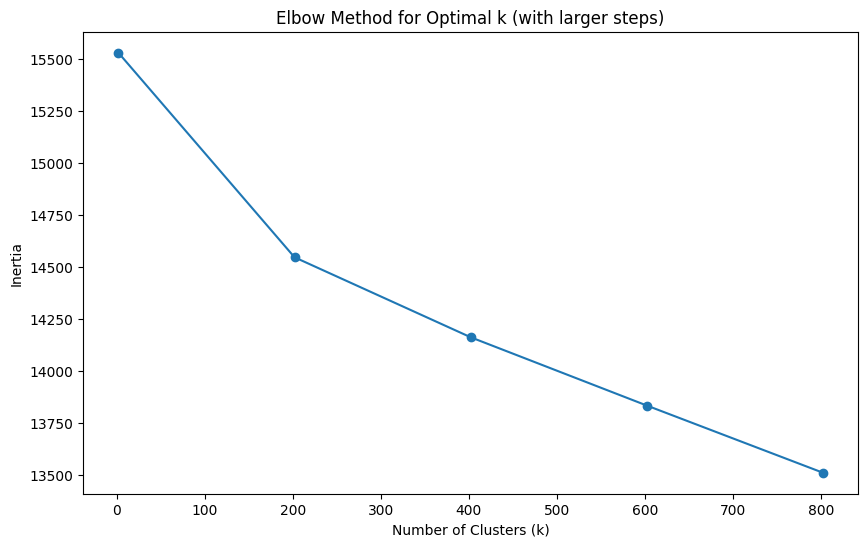

In [ ]:
# Determine the optimal number of clusters using elbow method (inertia values)
max_clusters = 1000

# Using elbow method (inertia values) to find the best k with larger steps
inertia_values = []
step_size = 200  # Set your desired step size
for k in range(2, max_clusters, step_size):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters, step_size), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k (with larger steps)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
start=time.time()

# Silhouette score with k=200
k=200
kmeans_model = KMeans(n_clusters=k, random_state=42, init='k-means++')
kmeans_model.fit(X)

labels = kmeans_model.labels_
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

end=time.time()
# Print training time:
print('Time taken to train kmeans_elbow: ' + str(end-start))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 200 clusters: 0.00880186795702813
Time taken to train kmeans_elbow: 652.3395504951477


In [ ]:
# Save the model to a pickle file

with open('/content/drive/Shareddrives/Math-156-Final-Project/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_model, f)

In [ ]:
# Import trained kmeans model (k=200)

with open('/content/drive/Shareddrives/Math-156-Final-Project/kmeans_model.pkl', 'rb') as f:
    kmeans_model = pickle.load(f)

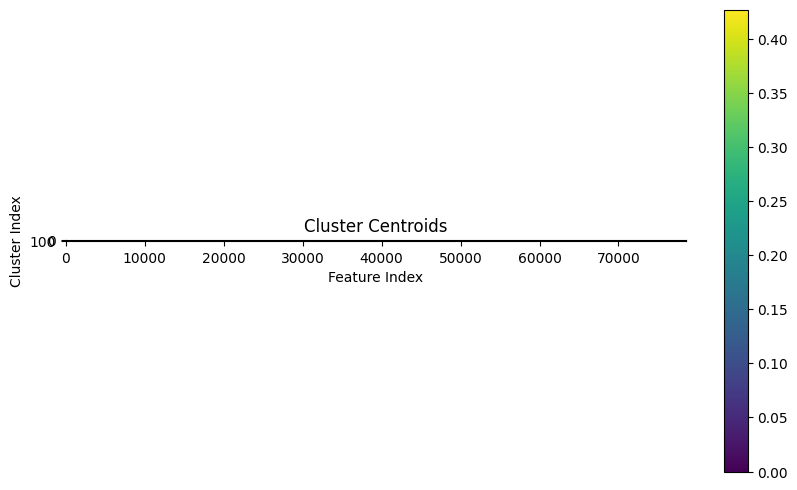

In [ ]:
# Obtain cluster centroids
centroids = kmeans_model.cluster_centers_

# Visualize cluster centroids in the original feature space
plt.figure(figsize=(10, 6))
plt.imshow(centroids, interpolation='nearest', cmap='viridis')
plt.title('Cluster Centroids')
plt.xlabel('Feature Index')
plt.ylabel('Cluster Index')
plt.colorbar()
plt.show()

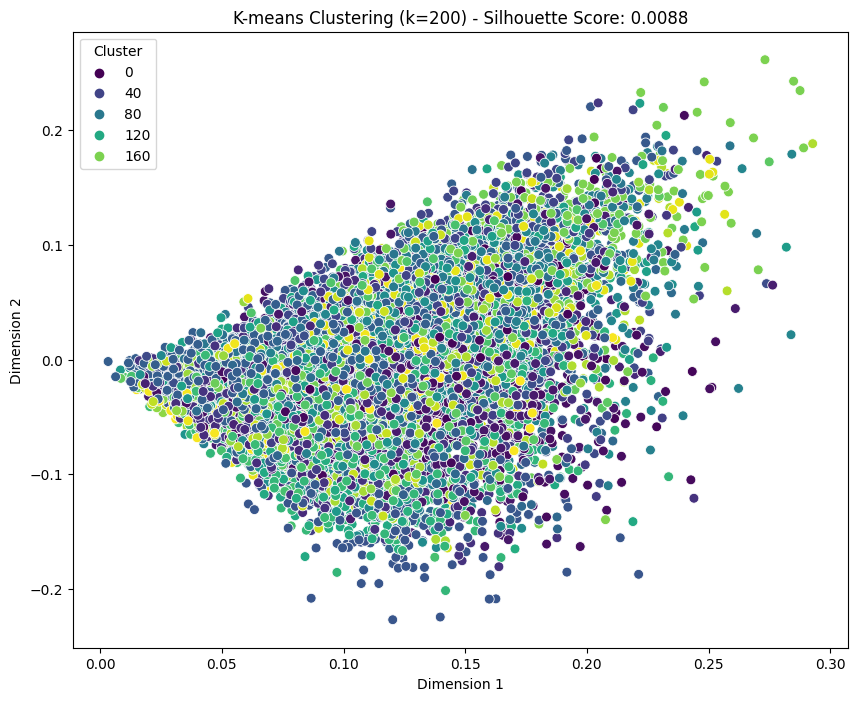

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

# Reduce dimensionality for visualization (optional, but can be helpful)
svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X)

# Create a scatter plot with cluster colors
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=labels, palette='viridis', s=50)
plt.title(f'K-means Clustering (k={k}) - Silhouette Score: {silhouette_avg:.4f}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import TruncatedSVD

# Fit K-means with the best k value
kmeans_model = KMeans(n_clusters=k, random_state=42)
labels = kmeans_model.fit_predict(X)

# Optionally, reduce dimensionality for visualization (3D)
svd = TruncatedSVD(n_components=3, random_state=42)
X_3d = svd.fit_transform(X)

# Create a 3D scatter plot with cluster colors
fig = px.scatter_3d(
    x=X_3d[:, 0],
    y=X_3d[:, 1],
    z=X_3d[:, 2],
    color=labels,
    title=f'K-means Clustering (k={k}) - Silhouette Score: {silhouette_avg:.4f}',
    labels={'x': 'Dimension 1', 'y': 'Dimension 2', 'z': 'Dimension 3'},
    opacity=0.7,
    size_max=10,
    color_continuous_scale='viridis',
)

fig.update_layout(scene=dict(aspectmode='cube'),
                  width=800,
                  height=800
                  )
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Silhouette scores

In [ ]:
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
best_silhouette_score = -1
best_silhouette_k = 0

for k in [2, 10, 50, 200, 500]:  # Try different values for k
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    if silhouette_avg > best_silhouette_score:
      best_silhouette_score = silhouette_avg
      best_silhouette_k = k
    print(f"Silhouette Score for {k} clusters: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for 2 clusters: 0.002249724406563622


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for 10 clusters: 0.002660465057725852


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for 50 clusters: 0.005218121326725755


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for 200 clusters: 0.00880186795702813


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for 500 clusters: 0.009509875425167761


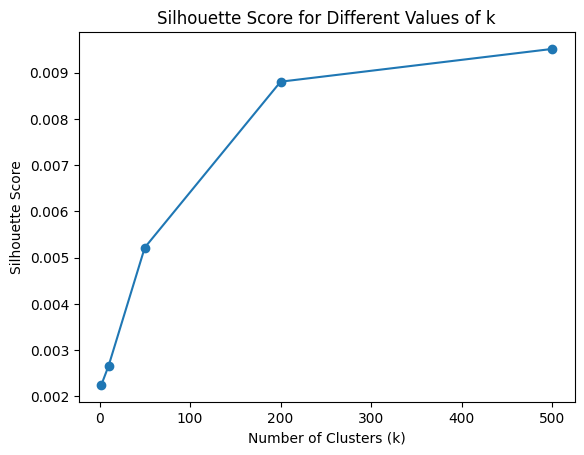

In [ ]:
plt.plot([2, 10, 50, 200, 500], silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

In [ ]:
print(best_silhouette_score)
print(best_silhouette_k)

0.009509875425167761
500


In [ ]:
start=time.time()

# Train the K-Means model with the optimal number of clusters
kmeans_silhouette = KMeans(n_clusters=best_silhouette_k, random_state=42, init='k-means++')
kmeans_silhouette.fit(X)

end=time.time()
# Print training time:
print('Time taken to train kmeans_silhouette: ' + str(end-start))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Time taken to train kmeans_silhouette: 1615.532974243164


In [ ]:
# Save the model to a pickle file

with open('/content/drive/Shareddrives/Math-156-Final-Project/kmeans_silhouette.pkl', 'wb') as f:
    pickle.dump(kmeans_silhouette, f)

In [ ]:
# Import trained kmeans model (k=500)

with open('/content/drive/Shareddrives/Math-156-Final-Project/kmeans_silhouette.pkl', 'rb') as f:
    kmeans_silhouette = pickle.load(f)

In [ ]:
import plotly.express as px
from sklearn.decomposition import TruncatedSVD

# Fit K-means with the best k value
best_k = best_silhouette_k
kmeans_model = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans_model.fit_predict(X)

# Optionally, reduce dimensionality for visualization (3D)
svd = TruncatedSVD(n_components=3, random_state=42)
X_3d = svd.fit_transform(X)

# Create a 3D scatter plot with cluster colors
fig = px.scatter_3d(
    x=X_3d[:, 0],
    y=X_3d[:, 1],
    z=X_3d[:, 2],
    color=labels,
    title=f'K-means Clustering (k={best_k}) - Silhouette Score: {best_silhouette_score:.4f}',
    labels={'x': 'Dimension 1', 'y': 'Dimension 2', 'z': 'Dimension 3'},
    opacity=0.7,
    size_max=10,
    color_continuous_scale='viridis',
)

fig.update_layout(scene=dict(aspectmode='cube'))
fig.show()

## SVD + DBSCAN

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import DBSCAN
import seaborn as sns
# from mpl_toolkits.mplot3d import Axes3D

In [ ]:
X.shape[1]

78504

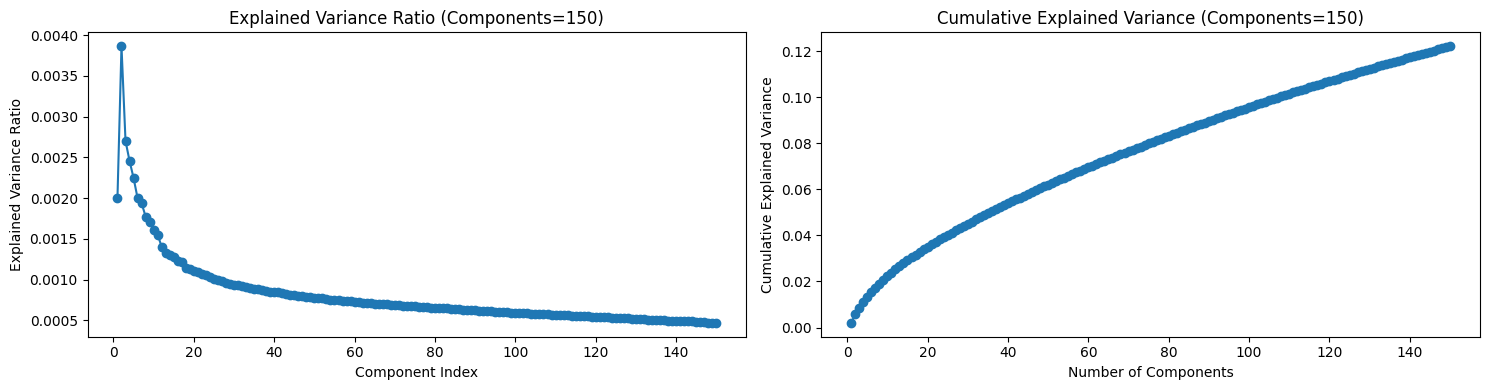

In [ ]:
# Try reducing to different numbers of components
n_components_list = [150]  # Try different values
plt.figure(figsize=(15, 4 * len(n_components_list)))

for i, n_components in enumerate(n_components_list):
    # Apply TruncatedSVD
    svd = TruncatedSVD(n_components=n_components)
    X_svd = svd.fit_transform(X)

    # Visualize the explained variance
    explained_variance_ratio = svd.explained_variance_ratio_
    cumulative_explained_variance = explained_variance_ratio.cumsum()

    # Plot the explained variance ratio
    plt.subplot(len(n_components_list), 2, 2 * i + 1)
    plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o')
    plt.title(f'Explained Variance Ratio (Components={n_components})')
    plt.xlabel('Component Index')
    plt.ylabel('Explained Variance Ratio')

    # Plot the cumulative explained variance
    plt.subplot(len(n_components_list), 2, 2 * i + 2)
    plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o')
    plt.title(f'Cumulative Explained Variance (Components={n_components})')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

In [ ]:
n_components = 25
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(X)

In [ ]:
# Set the range of values for eps and min_samples
eps_range = np.linspace(0.1, 2.0, 20)
min_samples_range = range(2, 8)

# Initialize arrays to store silhouette scores
silhouette_scores = np.zeros((len(min_samples_range), len(eps_range)))

# Find the best parameters
best_min_samples = 2
best_eps = 0
best_sil = 0
best_clusters = 0

for i, min_samples in enumerate(min_samples_range):
    for j, eps in enumerate(eps_range):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_svd)
        labels = dbscan.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters_ > 1:
            silhouette_avg = silhouette_score(X_svd, labels=labels)
            silhouette_scores[i, j] = silhouette_avg

            if silhouette_avg > best_sil:
                best_sil = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_clusters = n_clusters


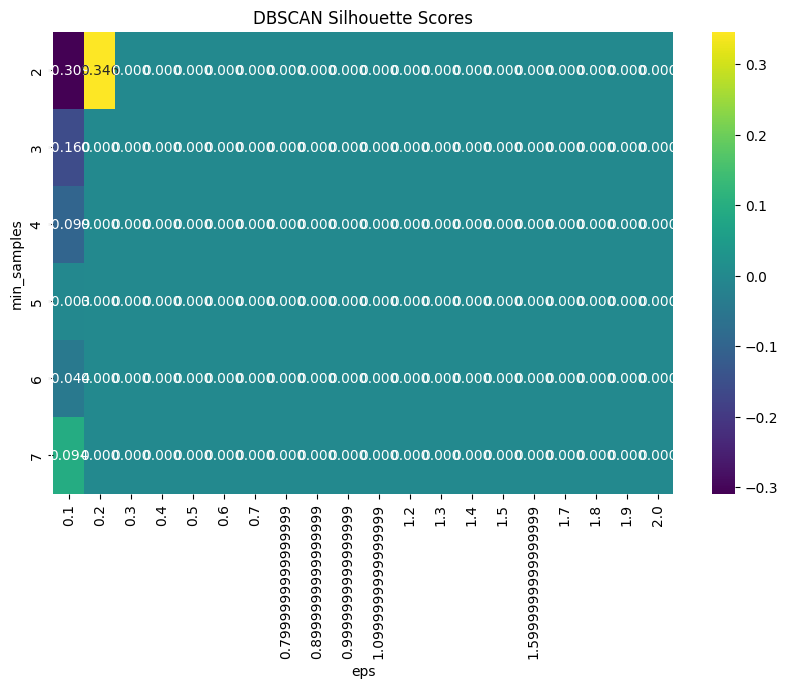

Best Silhouette Score: 0.3463358197667863
Best min_samples: 2
Best eps: 0.2


In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, fmt=".3f", cmap="viridis", xticklabels=eps_range, yticklabels=min_samples_range)
plt.title('DBSCAN Silhouette Scores')
plt.xlabel('eps')
plt.ylabel('min_samples')
plt.show()

# Print the best parameters
print("Best Silhouette Score:", best_sil)
print("Best min_samples:", best_min_samples)
print("Best eps:", best_eps)
print("Number of clusters: ", best_clusters)

In [ ]:
best_min_samples = 2
best_eps = 0.2

In [ ]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X_svd)
labels = dbscan.labels_

In [ ]:
np.unique(labels)

array([-1,  0,  1])

In [ ]:
# Save the model to a pickle file

with open('/content/drive/Shareddrives/Math-156-Final-Project/dbscan.pkl', 'wb') as f:
    pickle.dump(dbscan, f)

In [ ]:
# Import trained kmeans model (k=7)

with open('/content/drive/Shareddrives/Math-156-Final-Project/dbscan.pkl', 'rb') as f:
    dbscan = pickle.load(f)

## Sample Abstracts

Sample abstracts are from articles outside of our dataset range (2018-2020)

1.   Pretest and Stein-Type Estimations in Quantile Regression Model
  *   Year: 2017
  *   Category: Statistics Theory (math.ST)

2.   Smoothed GMM for quantile models
  *   Year: 2017
  *   Category: Statistics Theory (math.ST); Econometrics (econ.EM); Methodology (stat.ME)

3. Testing High-dimensional Covariance Matrices under the Elliptical Distribution and Beyond
  *   Year: 2017
  *   Category: Statistics Theory (math.ST)


In [ ]:
# Now, you can use the trained model to find the cluster for a given abstract
abstract_sample_1 = "In this study, we consider preliminary test and shrinkage estimation strategies for quantile regression models. In classical Least Squares Estimation (LSE) method, the relationship between the explanatory and explained variables in the coordinate plane is estimated with a mean regression line. In order to use LSE, there are three main assumptions on the error terms showing white noise process of the regression model, also known as Gauss-Markov Assumptions, must be met: (1) The error terms have zero mean, (2) The variance of the error terms is constant and (3) The covariance between the errors is zero i.e., there is no autocorrelation. However, data in many areas, including econometrics, survival analysis and ecology, etc. does not provide these assumptions. First introduced by Koenker, quantile regression has been used to complement this deficiency of classical regression analysis and to improve the least square estimation. The aim of this study is to improve the performance of quantile regression estimators by using pre-test and shrinkage strategies. A Monte Carlo simulation study including a comparison with quantile L1--type estimators such as Lasso, Ridge and Elastic Net are designed to evaluate the performances of the estimators. Two real data examples are given for illustrative purposes. Finally, we obtain the asymptotic results of suggested estimators"
abstract_sample_2 = "This paper develops theory for feasible estimators of finite-dimensional parameters identified by general conditional quantile restrictions, under much weaker assumptions than previously seen in the literature. This includes instrumental variables nonlinear quantile regression as a special case. More specifically, we consider a set of unconditional moments implied by the conditional quantile restrictions, providing conditions for local identification. Since estimators based on the sample moments are generally impossible to compute numerically in practice, we study feasible estimators based on smoothed sample moments. We propose a method of moments estimator for exactly identified models, as well as a generalized method of moments estimator for over-identified models. We establish consistency and asymptotic normality of both estimators under general conditions that allow for weakly dependent data and nonlinear structural models. Simulations illustrate the finite-sample properties of the methods. Our in-depth empirical application concerns the consumption Euler equation derived from quantile utility maximization. Advantages of the quantile Euler equation include robustness to fat tails, decoupling of risk attitude from the elasticity of intertemporal substitution, and log-linearization without any approximation error. For the four countries we examine, the quantile estimates of discount factor and elasticity of intertemporal substitution are economically reasonable for a range of quantiles above the median, even when two-stage least squares estimates are not reasonable."
abstract_sample_3 = "Testing High-dimensional Covariance Matrices under the Elliptical Distribution and Beyond"
# abstract_sample_3 = "Vision-Language Models (VLMs) are trained on vast amounts of data captured by humans emulating our understanding of the world. However, known as visual illusions, human's perception of reality isn't always faithful to the physical world. This raises a key question: do VLMs have the similar kind of illusions as humans do, or do they faithfully learn to represent reality? To investigate this question, we build a dataset containing five types of visual illusions and formulate four tasks to examine visual illusions in state-of-the-art VLMs. Our findings have shown that although the overall alignment is low, larger models are closer to human perception and more susceptible to visual illusions. Our dataset and initial findings will promote a better understanding of visual illusions in humans and machines and provide a stepping stone for future computational models that can better align humans and machines in perceiving and communicating about the shared visual world. The code and data are available at this https URL."


abstract_sample_1 = process_string(abstract_sample_1)
abstract_sample_2 = process_string(abstract_sample_2)
abstract_sample_3 = process_string(abstract_sample_3)

abstract_sample_1_vectorized = tfid_vectorizer.transform([abstract_sample_1])
abstract_sample_2_vectorized = tfid_vectorizer.transform([abstract_sample_2])
abstract_sample_3_vectorized = tfid_vectorizer.transform([abstract_sample_3])


## Clustering Model Sample Tests

DBSCAN identifies outliers with label -1, so if a point does not belong to any cluster, it will be assigned this label.

In [ ]:
cluster_1_kmeans_k500 = kmeans_silhouette.predict(abstract_sample_1_vectorized)
cluster_2_kmeans_k500 = kmeans_silhouette.predict(abstract_sample_2_vectorized)
cluster_3_kmeans_k500 = kmeans_silhouette.predict(abstract_sample_3_vectorized)

cluster_1_dbscan = dbscan.fit_predict(abstract_sample_1_vectorized)
cluster_2_dbscan = dbscan.fit_predict(abstract_sample_2_vectorized)
cluster_3_dbscan = dbscan.fit_predict(abstract_sample_3_vectorized)

In [ ]:
print("K-means (k=500) predicted label for abstract sample 1: ", cluster_1_kmeans_k500[0])
print("K-means (k=500) predicted label for abstract sample 2: ", cluster_2_kmeans_k500[0])
print("K-means (k=500) predicted label for abstract sample 3: ", cluster_3_kmeans_k500[0])

K-means (k=500) predicted label for abstract sample 1:  81
K-means (k=500) predicted label for abstract sample 2:  319
K-means (k=500) predicted label for abstract sample 3:  109


In [ ]:
print("DBSCAN predicted label for abstract sample 1: ", cluster_1_dbscan[0])
print("DBSCAN predicted label for abstract sample 2: ", cluster_2_dbscan[0])
print("DBSCAN predicted label for abstract sample 3: ", cluster_3_dbscan[0])

DBSCAN predicted label for abstract sample 1:  -1
DBSCAN predicted label for abstract sample 2:  -1
DBSCAN predicted label for abstract sample 3:  -1


## Nearest Neighbors using ANNOY

In [ ]:
!pip install annoy

In [ ]:
from annoy import AnnoyIndex

In [ ]:
kmeans_labels = kmeans_silhouette.labels_

In [ ]:
start=time.time()

indices1 = [i for i, label in enumerate(kmeans_labels) if label == cluster_1_kmeans_k500]

num_trees = 10
embedding_size = X.shape[1]
annoy_index1 = AnnoyIndex(embedding_size, 'angular')

for i, index in enumerate(indices1):
    vector = X[index].toarray().flatten()
    annoy_index1.add_item(i, vector)

annoy_index1.build(num_trees)

# Find the 10 nearest papers
k = 10
nearest_indices1 = annoy_index1.get_nns_by_item(0, k)

# Retrieve the actual indices of the nearest papers
nearest_paper_indices1 = [indices1[index] for index in nearest_indices1]

cluster_papers = papers.loc[indices1]

# Get the nearest papers within the cluster
nearest_papers1 = cluster_papers.loc[nearest_paper_indices1]

end=time.time()
# Print training time:
print('Time taken to find 10 nearest neighbors for abstract sample 1: ' + str(end-start))

nearest_papers1

Time taken to find 10 nearest neighbors for abstract sample 1: 0.8448419570922852


,id,title,abstract,category,year
83,1306.0084,Conditional Expectation of a Markov Kernel Giv...,markov kernels play a decisive role in probab...,"[math.ST, stat.TH]",2020
1624,1706.03955,A Note on the Relationship Between Conditional...,two known results on the relationship between...,"[math.ST, stat.TH]",2019
588,1606.07282,A review of Gaussian Markov models for conditi...,markov models lie at the interface between st...,"[stat.ME, cs.AI, stat.ML]",2020
14433,2010.08864,Markov Neighborhood Regression for High-Dimens...,this paper proposes an innovative method for ...,[stat.ME],2020
9698,1907.12912,On the estimation of average treatment effects...,we are interested in the estimation of averag...,[stat.ME],2020
1260,1703.06131,Inference via low-dimensional couplings,we investigate the lowdimensional structure o...,"[stat.ME, stat.CO, stat.ML]",2018
8932,1906.00198,nprobust: Nonparametric Kernel-Based Estimatio...,nonparametric kernel density and local polyno...,"[stat.CO, econ.EM, stat.ME]",2019
13322,2006.06560,Generalization error in high-dimensional perce...,we consider a commonly studied supervised cla...,"[stat.ML, cond-mat.dis-nn, cs.LG, math.ST, sta...",2020
1733,1707.02331,Shrinkage Estimation Strategies in Generalized...,in this study we propose shrinkage methods ba...,"[math.ST, stat.TH]",2020
1008,1612.09413,Permuted and Augmented Stick-Breaking Bayesian...,to model categorical response variables given...,"[stat.ME, stat.ML]",2018


In [ ]:
start = time.time()

indices2 = [i for i, label in enumerate(kmeans_labels) if label == cluster_2_kmeans_k500]  # Changed 1 to 2

num_trees = 10
embedding_size = X.shape[1]
annoy_index2 = AnnoyIndex(embedding_size, 'angular')

for i, index in enumerate(indices2):
    vector = X[index].toarray().flatten()
    annoy_index2.add_item(i, vector)

annoy_index2.build(num_trees)

# Find the 10 nearest papers
k = 10
nearest_indices2 = annoy_index2.get_nns_by_item(0, k)

# Retrieve the actual indices of the nearest papers
nearest_paper_indices2 = [indices2[index] for index in nearest_indices2]

cluster_papers = papers.loc[indices2]

# Get the nearest papers within the cluster
nearest_papers2 = cluster_papers.loc[nearest_paper_indices2]

end = time.time()
# Print training time:
print('Time taken to find 10 nearest neighbors for abstract sample 2: ' + str(end - start))

nearest_papers2

Time taken to find 10 nearest neighbors for abstract sample 2: 0.11216211318969727


,id,title,abstract,category,year
696,1609.00710,Flexible Bayesian Quantile Regression in Ordin...,the paper introduces an estimation method for...,"[math.ST, stat.TH]",2019
8438,1904.12113,Tail models and the statistical limit of accur...,in risk management tail risks are of crucial ...,"[q-fin.RM, stat.ME]",2020
11608,2001.03458,Censored Quantile Regression Forest,random forests are powerful nonparametric reg...,"[stat.ML, cs.LG]",2020
9066,1906.04404,Extending Deep Learning Models for Limit Order...,we showcase how quantile regression qr can be...,[q-fin.TR],2019
10230,1909.05560,Estimation and Applications of Quantile Regres...,this paper develops a framework for quantile ...,"[econ.EM, stat.ME]",2019
4957,1807.06977,Quantile-Regression Inference With Adaptive Co...,regression quantiles have asymptotic variance...,[econ.EM],2019
10033,1908.10693,DDSketch: A fast and fully-mergeable quantile ...,summary statistics such as the mean and varia...,"[cs.DB, cs.DS]",2019
4202,1805.07395,More green space is related to less antidepres...,exposure to green space seems to be beneficia...,[stat.AP],2018
5162,1808.01541,Statistics on Open Access Books Available thro...,open access oa books available through the di...,[cs.DL],2018
7540,1902.08684,Discovering Language of the Stocks,stock prediction has always been attractive a...,"[cs.CE, q-fin.ST]",2019


In [ ]:
start = time.time()

indices3 = [i for i, label in enumerate(kmeans_labels) if label == cluster_3_kmeans_k500]  # Changed 1 to 3

num_trees = 10
embedding_size = X.shape[1]
annoy_index3 = AnnoyIndex(embedding_size, 'angular')

for i, index in enumerate(indices3):
    vector = X[index].toarray().flatten()
    annoy_index3.add_item(i, vector)

annoy_index3.build(num_trees)

# Find the 10 nearest papers
k = 10
nearest_indices3 = annoy_index3.get_nns_by_item(0, k)

# Retrieve the actual indices of the nearest papers
nearest_paper_indices3 = [indices3[index] for index in nearest_indices3]

cluster_papers = papers.loc[indices3]

# Get the nearest papers within the cluster
nearest_papers3 = cluster_papers.loc[nearest_paper_indices3]

end = time.time()
# Print training time:
print('Time taken to find 10 nearest neighbors for abstract sample 3: ' + str(end - start))

nearest_papers3

Time taken to find 10 nearest neighbors for abstract sample 3: 0.2460651397705078


,id,title,abstract,category,year
357,1511.05710,Complex-Valued Gaussian Processes for Regression,in this paper we propose a novel bayesian sol...,[cs.LG],2018
5149,1808.01123,Covariance Matrix Estimation from Linearly-Cor...,covariance matrix estimation concerns the pro...,"[cs.IT, math.IT]",2019
11767,2001.09187,Certified and fast computations with shallow c...,many techniques for data science and uncertai...,"[math.NA, cs.LG, cs.NA, stat.CO]",2020
4203,1805.07460,Fast Kernel Approximations for Latent Force Mo...,a latent force model is a gaussian process wi...,"[stat.ML, cs.LG]",2018
6299,1811.04956,Recovery Map for Fermionic Gaussian Channels,a recovery map effectively cancels the action...,[quant-ph],2019
486,1604.03182,Cascade and locally dissipative realizations o...,this paper presents two realizations of linea...,"[quant-ph, cs.SY, math.OC]",2018
13211,2006.01448,Sparse Cholesky covariance parametrization for...,the sparse cholesky parametrization of the in...,"[stat.ML, cs.LG]",2020
3116,1802.01513,Covariance Matrix Estimation for Massive MIMO,we propose a novel pilot structure for covari...,"[cs.IT, math.IT]",2018
1923,1708.06296,Spiked sample covariance matrices with possibl...,in this paper we study the convergent limits ...,[math.PR],2020
425,1602.05522,Central limit theorems for functionals of larg...,in this paper we consider the asymptotic dist...,"[math.ST, stat.TH]",2019


In [ ]:
sample_abstract_1_category_actual = ['math.ST']
sample_abstract_2_category_actual = ['math.ST', 'econ.EM', 'stat.ME']
sample_abstract_3_category_actual = ['math.ST']

sample_abstract_1_category_actual_main = ['math']
sample_abstract_2_category_actual_main = ['math', 'econ', 'stat']
sample_abstract_3_category_actual_main = ['math']

In [ ]:
same_cat_find_1 = 0

for category in nearest_papers1['category']:
  if any(element in sample_abstract_1_category_actual for element in category):
    same_cat_find_1 += 1

same_cat_find_2 = 0

for category in nearest_papers2['category']:
  if any(element in sample_abstract_2_category_actual for element in category):
    same_cat_find_2 += 1

same_cat_find_3 = 0

for category in nearest_papers3['category']:
  if any(element in sample_abstract_3_category_actual for element in category):
    same_cat_find_3 += 1

print('Number of neighbors with EXACT same categorization as abstract sample 1: ', same_cat_find_1)
print('Number of neighbors with EXACT same categorization as abstract sample 1: ', same_cat_find_2)
print('Number of neighbors with EXACT same categorization as abstract sample 1: ', same_cat_find_3)

NameError: ignored

In [ ]:
nearest_papers1_main_category = nearest_papers1.explode('category')
nearest_papers1_main_category['category'] = nearest_papers1_main_category['category'].str.split('.').str[0]
nearest_papers1_main_category = nearest_papers1_main_category.drop_duplicates(subset=['abstract', 'category'])

same_cat_find_1_main = 0

for cat in nearest_papers1_main_category['category']:
  if cat in sample_abstract_1_category_actual_main:
    same_cat_find_1_main += 1

nearest_papers2_main_category = nearest_papers2.explode('category')
nearest_papers2_main_category['category'] = nearest_papers2_main_category['category'].str.split('.').str[0]
nearest_papers2_main_category = nearest_papers2_main_category.drop_duplicates(subset=['abstract', 'category'])

same_cat_find_2_main = 0

for cat in nearest_papers2_main_category['category']:
    if cat in sample_abstract_2_category_actual_main:
        same_cat_find_2_main += 1

nearest_papers3_main_category = nearest_papers3.explode('category')
nearest_papers3_main_category['category'] = nearest_papers3_main_category['category'].str.split('.').str[0]
nearest_papers3_main_category = nearest_papers3_main_category.drop_duplicates(subset=['abstract', 'category'])

same_cat_find_3_main = 0

for cat in nearest_papers3_main_category['category']:
    if cat in sample_abstract_3_category_actual_main:
        same_cat_find_3_main += 1

NameError: ignored

In [ ]:
print('Number of neighbors with same MAIN categorization as abstract sample 1:', same_cat_find_1_main)
print('Number of neighbors with same MAIN categorization as abstract sample 2:', same_cat_find_2_main)
print('Number of neighbors with same MAIN categorization as abstract sample 3:', same_cat_find_3_main)

Number of neighbors with same MAIN categorization as abstract sample 1: 4
Number of neighbors with same MAIN categorization as abstract sample 2: 8
Number of neighbors with same MAIN categorization as abstract sample 3: 6


# Supervised Learning

## papers_expanded

In [ ]:
papers_expanded

,abstract,category
0,in this work we consider a question in the ca...,math.DG
0,in this work we consider a question in the ca...,math.AP
0,in this work we consider a question in the ca...,math.MG
1,the gibbs measure theory for smooth potential...,math.DS
1,the gibbs measure theory for smooth potential...,math.CV
...,...,...
15766,we consider an integrable scalar partial diff...,nlin.SI
15767,we present a model for growing information ne...,physics.soc-ph
15768,the structure constants of quantum lie algebr...,math.QA
15769,this paper presents a simple model for repeat...,quant-ph


In [ ]:
from sklearn.model_selection import train_test_split

papers_train_df, papers_test_df = train_test_split(papers_expanded, test_size=0.2, random_state=42)

In [ ]:
# Write the training data to train.txt
with open('papers_train.txt', 'w', encoding='utf-8') as f_train:
    for index, row in papers_train_df.iterrows():
        labels = '__label__' + row['category']
        text = row['abstract']
        f_train.write(f'{labels} {text}\n')

# Write the testing data to test.txt
with open('papers_test.txt', 'w', encoding='utf-8') as f_test:
    for index, row in papers_test_df.iterrows():
        labels = '__label__' + row['category']
        text = row['abstract']
        f_test.write(f'{labels} {text}\n')

## papers_main_category

In [ ]:
papers_main_category

,abstract,category
0,in this work we consider a question in the ca...,math
1,the gibbs measure theory for smooth potential...,math
2,in this paper we leave the neighborhood of th...,physics
3,let k be an imaginary quadratic field with cl...,math
4,we consider a nonequilibrium process on a tim...,cond-mat
...,...,...
15766,we consider an integrable scalar partial diff...,nlin
15767,we present a model for growing information ne...,physics
15768,the structure constants of quantum lie algebr...,math
15769,this paper presents a simple model for repeat...,quant-ph


In [ ]:
papers_main_train_df, papers_main_test_df = train_test_split(papers_main_category, test_size=0.2, random_state=42)

# Write the training data to train.txt
with open('papers_main_train.txt', 'w', encoding='utf-8') as f_train:
    for index, row in papers_main_train_df.iterrows():
        labels = '__label__' + row['category']
        text = row['abstract']
        f_train.write(f'{labels} {text}\n')

# Write the testing data to test.txt
with open('papers_main_test.txt', 'w', encoding='utf-8') as f_test:
    for index, row in papers_main_test_df.iterrows():
        labels = '__label__' + row['category']
        text = row['abstract']
        f_test.write(f'{labels} {text}\n')

## fastText



`train_supervized` parameters:


    input             # training file path (required)
    lr                # learning rate [0.1]
    dim               # size of word vectors [100]
    ws                # size of the context window [5]
    epoch             # number of epochs [5]
    minCount          # minimal number of word occurences [1]
    minCountLabel     # minimal number of label occurences [1]
    minn              # min length of char ngram [0]
    maxn              # max length of char ngram [0]
    neg               # number of negatives sampled [5]
    wordNgrams        # max length of word ngram [1]
    loss              # loss function {ns, hs, softmax, ova} [softmax]
    bucket            # number of buckets [2000000]
    thread            # number of threads [number of cpus]
    lrUpdateRate      # change the rate of updates for the learning rate [100]
    t                 # sampling threshold [0.0001]
    label             # label prefix ['__label__']
    verbose           # verbose [2]
    pretrainedVectors # pretrained word vectors (.vec file) for supervised learning []


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=5e752d2197f3aeb712b47f6b45a1e7e2f26ac17914c2d2852b31054e506514b8
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
def print_fasttext_results(N, p, r):
    print("Number of samples\t" + str(N))
    print("Precision at {}\t{:.3f}".format(1, p)) # Precision at 1
    print("Recall at {}\t{:.3f}".format(1, r)) # Recall at 1

### Best wordNgrams - EXPANDED dataframe

In [ ]:
# Finding best wordNgrams - EXPANDED:

# Create a list of wordNgrams values to test
wordNgrams_values = [1, 2, 3, 4, 5, 6]

# Dictionary to store results
wordNgrams_results = {}

for wordNgrams_value in wordNgrams_values:
    start = time.time()

    # Train the FastText model
    fasttext_model_main_cat = fasttext.train_supervised(
        input='papers_train.txt',
        wordNgrams=wordNgrams_value,
        dim=100,
        loss='softmax',
        epoch=10
    )

     # Evaluate the model on the test set
    nexamples, precision, recall = fasttext_model_main_cat.test('papers_test.txt')
    wordNgrams_results[wordNgrams_value] = {'nexamples': nexamples, 'precision': precision, 'recall': recall}

    end = time.time()
    # Print training time
    print(f'Time taken to train fasttext model on EXPANDED dataframe with wordNgrams={wordNgrams_value}: {end - start}')

Time taken to train fasttext model on EXPANDED dataframe with wordNgrams=1: 20.24883198738098
Time taken to train fasttext model on EXPANDED dataframe with wordNgrams=2: 44.30397939682007
Time taken to train fasttext model on EXPANDED dataframe with wordNgrams=3: 61.57716155052185
Time taken to train fasttext model on EXPANDED dataframe with wordNgrams=4: 83.0550274848938
Time taken to train fasttext model on EXPANDED dataframe with wordNgrams=5: 105.749751329422
Time taken to train fasttext model on EXPANDED dataframe with wordNgrams=6: 122.53875923156738


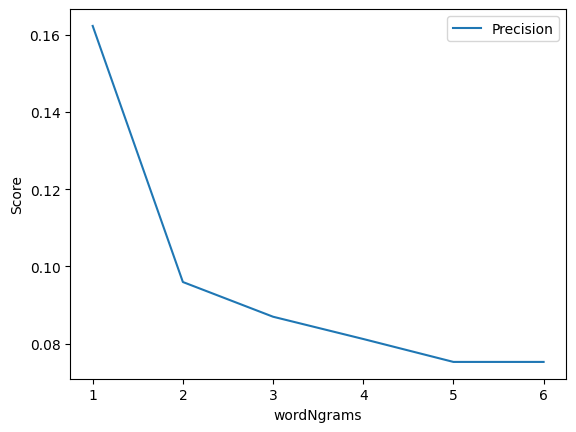

Best wordNgrams value: 1
Best precision score: 0.16225839267548323


In [ ]:
wordNgrams_values = list(wordNgrams_results.keys())
precision_values = [wordNgrams_results[val]['precision'] for val in wordNgrams_values]
recall_values = [wordNgrams_results[val]['recall'] for val in wordNgrams_values]

# Plot precision and recall values
plt.plot(wordNgrams_values, precision_values, label='Precision')
# plt.plot(wordNgrams_values, recall_values, label='Recall')

# Add labels and legend
plt.xlabel('wordNgrams')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.show()

# Find the wordNgrams value with the best precision score
best_wordNgrams = max(wordNgrams_results, key=lambda k: wordNgrams_results[k]['precision'])
best_precision = wordNgrams_results[best_wordNgrams]['precision']

print(f'Best wordNgrams value: {best_wordNgrams}')
print(f'Best precision score: {best_precision}')

### Best epoch - EXPANDED dataframe

In [ ]:
# Finding best epochs:

# Create a list of wordNgrams values to test
epoch_values = [5, 10, 20, 40, 80]

# Dictionary to store results
epoch_results = {}

for epoch_value in epoch_values:
    start = time.time()

    # Train the FastText model
    fasttext_model_main_cat = fasttext.train_supervised(
        input='papers_train.txt',
        wordNgrams=1,
        dim=100,
        loss='softmax',
        epoch=epoch_value
    )

     # Evaluate the model on the test set
    nexamples, precision, recall = fasttext_model_main_cat.test('papers_test.txt')
    epoch_results[epoch_value] = {'nexamples': nexamples, 'precision': precision, 'recall': recall}

    end = time.time()
    # Print training time
    print(f'Time taken to train fasttext model with epochs={epoch_value}: {end - start}')

Time taken to train fasttext model with epochs=5: 9.566197872161865
Time taken to train fasttext model with epochs=10: 20.279146909713745
Time taken to train fasttext model with epochs=20: 37.133331537246704
Time taken to train fasttext model with epochs=40: 91.17331743240356
Time taken to train fasttext model with epochs=80: 152.43134212493896


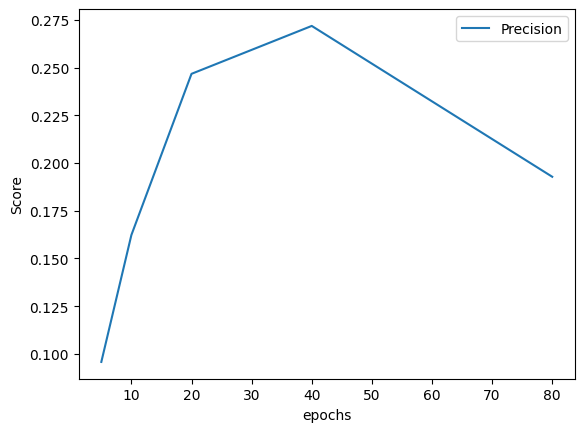

Best epoch value: 40
Best precision score: 0.27178704645642593


In [ ]:
epoch_values = list(epoch_results.keys())
precision_values = [epoch_results[val]['precision'] for val in epoch_values]
recall_values = [epoch_results[val]['recall'] for val in epoch_values]

# Plot precision and recall values
plt.plot(epoch_values, precision_values, label='Precision')
# plt.plot(wordNgrams_values, recall_values, label='Recall')

# Add labels and legend
plt.xlabel('epochs')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.show()

# Find the wordNgrams value with the best precision score
best_epochs = max(epoch_results, key=lambda k: epoch_results[k]['precision'])
best_precision_epochs = epoch_results[best_epochs]['precision']

print(f'Best epoch value: {best_epochs}')
print(f'Best precision score: {best_precision_epochs}')

### Train fastText on optimal parameters - EXPANDED dataframe

In [ ]:
start=time.time()

fasttext_model = fasttext.train_supervised(input='papers_train.txt', wordNgrams = best_wordNgrams, dim=100, loss = 'softmax',  epoch=best_epochs)

end=time.time()
# Print training time:
print('Time taken to train fasttext model: ' + str(end-start))

Time taken to train fasttext model: 75.46326732635498


In [ ]:
print_fasttext_results(*fasttext_model.test('papers_test.txt'))

Number of samples	5898
Precision at 1	0.272
Recall at 1	0.272


In [ ]:
# Sample predictions

print(sample_abstract_1_category_actual)
print(fasttext_model.predict(abstract_sample_1, k=3), '\n')
print(sample_abstract_2_category_actual)
print(fasttext_model.predict(abstract_sample_2, k=3), '\n')
print(sample_abstract_3_category_actual)
print(fasttext_model.predict(abstract_sample_2, k=3), '\n')

['math.ST']
(('__label__stat.ME', '__label__math.ST', '__label__stat.TH'), array([0.43756816, 0.19868472, 0.15963957])) 

['math.ST', 'econ.EM', 'stat.ME']
(('__label__math.ST', '__label__stat.TH', '__label__stat.ME'), array([0.19738884, 0.19550388, 0.17578442])) 

['math.ST']
(('__label__math.ST', '__label__stat.TH', '__label__stat.ME'), array([0.19738884, 0.19550388, 0.17578442])) 



### Best wordNgrams - MAIN CATEGORIES dataframe

In [ ]:
# Finding best wordNgrams - EXPANDED:

# Create a list of wordNgrams values to test
wordNgrams_values = [1, 2, 3, 4, 5, 6]

# Dictionary to store results
wordNgrams_results_main = {}

for wordNgrams_value in wordNgrams_values:
    start = time.time()

    # Train the FastText model
    fasttext_model_main_cat = fasttext.train_supervised(
        input='papers_main_train.txt',
        wordNgrams=wordNgrams_value,
        dim=100,
        loss='softmax',
        epoch=10
    )

     # Evaluate the model on the test set
    nexamples, precision, recall = fasttext_model_main_cat.test('papers_main_test.txt')
    wordNgrams_results_main[wordNgrams_value] = {'nexamples': nexamples, 'precision': precision, 'recall': recall}

    end = time.time()
    # Print training time
    print(f'Time taken to train fasttext model on MAIN CATEGORIES dataframe with wordNgrams={wordNgrams_value}: {end - start}')

Time taken to train fasttext model on MAIN CATEGORIES dataframe with wordNgrams=1: 18.145920753479004
Time taken to train fasttext model on MAIN CATEGORIES dataframe with wordNgrams=2: 34.22508978843689
Time taken to train fasttext model on MAIN CATEGORIES dataframe with wordNgrams=3: 42.48855662345886
Time taken to train fasttext model on MAIN CATEGORIES dataframe with wordNgrams=4: 57.71929335594177
Time taken to train fasttext model on MAIN CATEGORIES dataframe with wordNgrams=5: 76.06112051010132
Time taken to train fasttext model on MAIN CATEGORIES dataframe with wordNgrams=6: 91.03135585784912


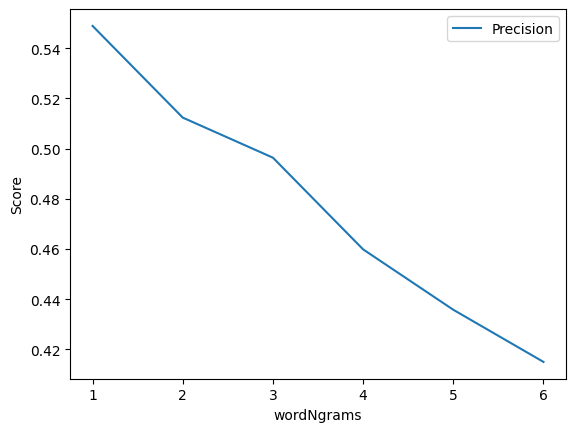

Best wordNgrams value: 1
Best precision score: 0.5489166119500984


In [ ]:
wordNgrams_values = list(wordNgrams_results_main.keys())
precision_values = [wordNgrams_results_main[val]['precision'] for val in wordNgrams_values]
recall_values = [wordNgrams_results_main[val]['recall'] for val in wordNgrams_values]

# Plot precision and recall values
plt.plot(wordNgrams_values, precision_values, label='Precision')
# plt.plot(wordNgrams_values, recall_values, label='Recall')

# Add labels and legend
plt.xlabel('wordNgrams')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.show()

# Find the wordNgrams value with the best precision score
best_wordNgrams_main = max(wordNgrams_results_main, key=lambda k: wordNgrams_results_main[k]['precision'])
best_precision_main = wordNgrams_results_main[best_wordNgrams_main]['precision']

print(f'Best wordNgrams value: {best_wordNgrams_main}')
print(f'Best precision score: {best_precision_main}')

### Best epoch - MAIN CATEGORIES dataframe

In [ ]:
# Finding best epochs:

# Create a list of wordNgrams values to test
epoch_values = [5, 10, 20, 40, 80]

# Dictionary to store results
epoch_results_main = {}

for epoch_value in epoch_values:
    start = time.time()

    # Train the FastText model
    fasttext_model_main_cat = fasttext.train_supervised(
        input='papers_main_train.txt',
        wordNgrams=1,
        dim=100,
        loss='softmax',
        epoch=epoch_value
    )

     # Evaluate the model on the test set
    nexamples, precision, recall = fasttext_model_main_cat.test('papers_main_test.txt')
    epoch_results_main[epoch_value] = {'nexamples': nexamples, 'precision': precision, 'recall': recall}

    end = time.time()
    # Print training time
    print(f'Time taken to train fasttext model with epochs={epoch_value}: {end - start}')

Time taken to train fasttext model with epochs=5: 6.639657497406006
Time taken to train fasttext model with epochs=10: 13.526378154754639
Time taken to train fasttext model with epochs=20: 26.367579698562622
Time taken to train fasttext model with epochs=40: 47.37903809547424
Time taken to train fasttext model with epochs=80: 107.03952956199646


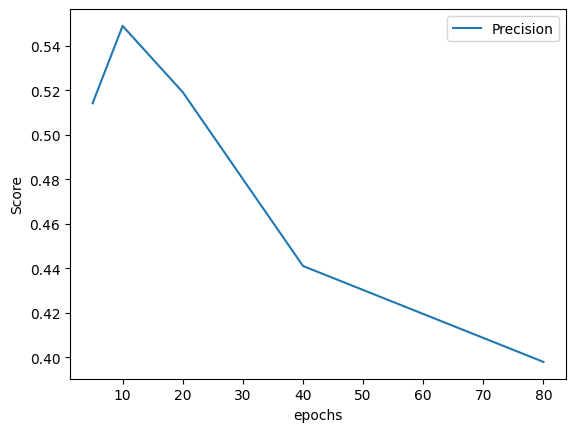

Best epoch value: 10
Best precision score: 0.5489166119500984


In [ ]:
epoch_values = list(epoch_results_main.keys())
precision_values = [epoch_results_main[val]['precision'] for val in epoch_values]
recall_values = [epoch_results_main[val]['recall'] for val in epoch_values]

# Plot precision and recall values
plt.plot(epoch_values, precision_values, label='Precision')
# plt.plot(wordNgrams_values, recall_values, label='Recall')

# Add labels and legend
plt.xlabel('epochs')
plt.ylabel('Score')
plt.legend()

# Show the plot
plt.show()

# Find the wordNgrams value with the best precision score
best_epochs_main = max(epoch_results_main, key=lambda k: epoch_results_main[k]['precision'])
best_precision_epochs_main = epoch_results_main[best_epochs_main]['precision']

print(f'Best epoch value: {best_epochs_main}')
print(f'Best precision score: {best_precision_epochs_main}')

### Train fastText on optimal parameters - MAIN CATEGORIES dataframe

In [ ]:
start=time.time()

fasttext_model_main = fasttext.train_supervised(input='papers_main_train.txt', wordNgrams = best_wordNgrams_main, dim=100, loss = 'softmax',  epoch=best_epochs_main)

end=time.time()
# Print training time:
print('Time taken to train fasttext model: ' + str(end-start))

Time taken to train fasttext model: 12.766728162765503


In [ ]:
print_fasttext_results(*fasttext_model_main.test('papers_main_test.txt'))

Number of samples	4569
Precision at 1	0.549
Recall at 1	0.549


In [ ]:
# Sample predictions

print(sample_abstract_1_category_actual_main)
print(fasttext_model_main.predict(abstract_sample_1, k=3), '\n')
print(sample_abstract_2_category_actual_main)
print(fasttext_model_main.predict(abstract_sample_2, k=3), '\n')
print(sample_abstract_3_category_actual_main)
print(fasttext_model_main.predict(abstract_sample_2, k=3), '\n')

['math']
(('__label__stat', '__label__cs', '__label__math'), array([0.4582257 , 0.27968535, 0.12767258])) 

['math', 'econ', 'stat']
(('__label__math', '__label__stat', '__label__cs'), array([0.31133494, 0.29242945, 0.18723139])) 

['math']
(('__label__math', '__label__stat', '__label__cs'), array([0.31133494, 0.29242945, 0.18723139])) 



## KNN and Random Forest

### With specific categories

In [ ]:
X = papers_expanded['abstract'].values
Y = papers_expanded['category'].values

In [ ]:
print(Y[0] + '  ' + X[0])

math.DS   the gibbs measure theory for smooth potentials is an old and beautiful subject and has many important applications in modern dynamical systems for continuous potentials it is impossible to have such a theory in general however we develop a dual geometric gibbs type measure theory for certain continuous potentials in this paper following some ideas and techniques from teichmuller theory for riemann surfaces furthermore we prove that the space of those continuous potentials has a teichmuller structure moreover this teichmuller structure is a complete structure and is the completion of the space of smooth potentials under this teichmuller structure thus our dual geometric gibbs type theory is the completion of the gibbs measure theory for smooth potentials from the dual geometric point of view 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
vectorizer = TfidfVectorizer(max_features=1024, stop_words='english')  # You can adjust max_features as needed
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y_encoded, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(17281, 1024)

In [ ]:
y_train.shape

(17281,)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.11525109928257347
Classification Report:
               precision    recall  f1-score   support

           1       0.12      0.10      0.11        21
           2       0.00      0.00      0.00        29
           3       0.18      0.12      0.15        33
           4       0.38      0.35      0.36        43
           5       0.00      0.00      0.00        36
           6       0.25      0.38      0.30        37
           7       0.00      0.00      0.00        10
           8       0.17      0.17      0.17        42
           9       0.21      0.40      0.27        84
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.10      0.09      0.10        33
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00         9
          16       0.03      0.03      0.03       102
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create the KNeighborsClassifier model
# You can adjust the 'n_neighbors' parameter based on your data
model = KNeighborsClassifier(n_neighbors=15)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.20342513307104837
Classification Report:
               precision    recall  f1-score   support

           1       0.32      0.29      0.30        21
           2       0.07      0.07      0.07        29
           3       0.18      0.18      0.18        33
           4       0.28      0.49      0.35        43
           5       0.06      0.03      0.04        36
           6       0.26      0.57      0.36        37
           7       0.00      0.00      0.00        10
           8       0.13      0.21      0.16        42
           9       0.33      0.67      0.44        84
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.25      0.27      0.26        33
          13       0.14      0.12      0.13        41
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00         9
          16       0.13      0.16      0.14       102
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

### Now trying with broad categories

In [ ]:
papers_main_category = papers_expanded.copy()
papers_main_category['category'] = papers_expanded['category'].str.split('.').str[0]


In [ ]:
print(papers_main_category['category'].nunique())

21


In [ ]:
X = papers_main_category['abstract'].values
Y = papers_main_category['category'].values

In [ ]:
print(Y[0] + '  ' + X[0])

math   the gibbs measure theory for smooth potentials is an old and beautiful subject and has many important applications in modern dynamical systems for continuous potentials it is impossible to have such a theory in general however we develop a dual geometric gibbs type measure theory for certain continuous potentials in this paper following some ideas and techniques from teichmuller theory for riemann surfaces furthermore we prove that the space of those continuous potentials has a teichmuller structure moreover this teichmuller structure is a complete structure and is the completion of the space of smooth potentials under this teichmuller structure thus our dual geometric gibbs type theory is the completion of the gibbs measure theory for smooth potentials from the dual geometric point of view 


In [ ]:
vectorizer = TfidfVectorizer(max_features=1024, stop_words='english')  # You can adjust max_features as needed
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y_encoded, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(17281, 1024)

In [ ]:
y_train.shape

(17281,)

In [ ]:
# Create the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.5084471187225179
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.56      0.61       199
           1       0.53      0.45      0.49       243
           2       0.61      0.74      0.67      1791
           3       0.00      0.00      0.00        12
           4       0.07      0.04      0.05       251
           5       0.00      0.00      0.00        32
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        39
          10       0.54      0.60      0.57       741
          11       0.00      0.00      0.00        56
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         3
          15       0.40      0.36      0.38       380
          17       0.15     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create the KNeighborsClassifier model
# You can adjust the 'n_neighbors' parameter based on your data
model = KNeighborsClassifier(n_neighbors=15)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.5644526729923629
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.60      0.58       199
           1       0.53      0.53      0.53       243
           2       0.61      0.85      0.71      1791
           3       0.00      0.00      0.00        12
           4       0.32      0.04      0.06       251
           5       0.08      0.06      0.07        32
           6       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00        39
          10       0.54      0.64      0.58       741
          11       0.00      0.00      0.00        56
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         3
          15       0.41      0.27      0.32       380
          17       0.27     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
